# Task A1

In [325]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

#### You may need to install xlrd, to install xlrd, type: pip install xlrd
#### Make Sure you type it in the jupyter terminal

In [326]:
df=pd.read_excel('energy_data.xlsx')

In [327]:
df

,State,Fuel_Type,Category,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,VIC,Black coal,Non-renewable fuels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.9,36.3,NaN
1,VIC,Brown coal,Non-renewable fuels,52094.0,51541.7,51066.5,52059.7,45317.6,43977.7,48336.8,46202.2,43557.8,36067.0
2,VIC,Natural gas,Non-renewable fuels,1451.9,1697.9,1289.8,1142.5,3247.7,3239.3,2390.9,1892.2,2658.7,3899.4
3,VIC,Oil products,Non-renewable fuels,20.4,1.1,38.2,4.0,10.7,145.8,156.0,70.6,109.3,164.8
4,VIC,Other,Non-renewable fuels,61.1,115.9,114.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,VIC,Biomass,Renewable fuels,292.0,303.4,339.6,859.3,845.1,886.9,672.2,747.7,694.5,661.8
6,VIC,Wind,Renewable fuels,573.0,1406.0,1434.4,1416.2,2005.1,2771.9,3067.8,3341.8,3560.9,4224.2
7,VIC,Hydro,Renewable fuels,557.8,843.7,1118.5,1047.4,940.3,1103.0,1170.9,1207.6,824.8,785.3
8,VIC,Large-scale solar PV,Renewable fuels,NaN,NaN,NaN,NaN,NaN,4.4,9.1,11.5,13.8,39.4
9,VIC,Small-scale solar PV,Renewable fuels,24.1,66.2,205.5,378.7,580.1,674.2,874.8,-1056.1,1231.7,1481.2


### Replacing Values with Zero, 1. First, read the data for Victoria state into a dataframe. You will observe that some values for the fuel types (eg. Black coal etc.) are missing or have ‘Nan’. To handle it, replace these values with zero (using appropriate python code) before proceeding with the rest of the questions .

In [328]:
df.replace(np.NaN,0,inplace=True) #Using replace method, you can also use filna() method for dataframes
#df=df.fillna(0)

In [329]:
df

,State,Fuel_Type,Category,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,VIC,Black coal,Non-renewable fuels,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.9,36.3,0.0
1,VIC,Brown coal,Non-renewable fuels,52094.0,51541.7,51066.5,52059.7,45317.6,43977.7,48336.8,46202.2,43557.8,36067.0
2,VIC,Natural gas,Non-renewable fuels,1451.9,1697.9,1289.8,1142.5,3247.7,3239.3,2390.9,1892.2,2658.7,3899.4
3,VIC,Oil products,Non-renewable fuels,20.4,1.1,38.2,4.0,10.7,145.8,156.0,70.6,109.3,164.8
4,VIC,Other,Non-renewable fuels,61.1,115.9,114.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,VIC,Biomass,Renewable fuels,292.0,303.4,339.6,859.3,845.1,886.9,672.2,747.7,694.5,661.8
6,VIC,Wind,Renewable fuels,573.0,1406.0,1434.4,1416.2,2005.1,2771.9,3067.8,3341.8,3560.9,4224.2
7,VIC,Hydro,Renewable fuels,557.8,843.7,1118.5,1047.4,940.3,1103.0,1170.9,1207.6,824.8,785.3
8,VIC,Large-scale solar PV,Renewable fuels,0.0,0.0,0.0,0.0,0.0,4.4,9.1,11.5,13.8,39.4
9,VIC,Small-scale solar PV,Renewable fuels,24.1,66.2,205.5,378.7,580.1,674.2,874.8,-1056.1,1231.7,1481.2


### 1.a) Using Python, plot the total energy generation in Victoria over the time period covered in the dataset (2009 to 2018). Describe the trend you see in the overall energy generation for the given time period.

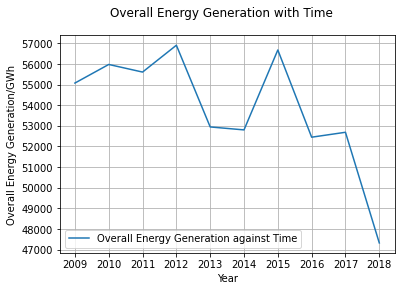

In [330]:
Overall_Energy=np.array([0 for i in range(10)],dtype='float64')
STARTING_YEAR=2009
for year in range(2009,2019):
    Overall_Energy[year-STARTING_YEAR]=df[year].sum()
year=np.array([year for year in range(2009,2019)],dtype='int32')
plt.plot(year,Overall_Energy,label='Overall Energy Generation against Time')
plt.xlabel('Year')
plt.ylabel('Overall Energy Generation/GWh')
plt.grid()
plt.xticks(year)
plt.yticks(np.arange(47000,58000,1000))
plt.suptitle('Overall Energy Generation with Time')
plt.legend()
plt.savefig('A1,task 1a')

### 1.b) Draw a new plot showing the trend in total renewable and non-renewable energy generation for the same time period? What trend can you observe from this graph?

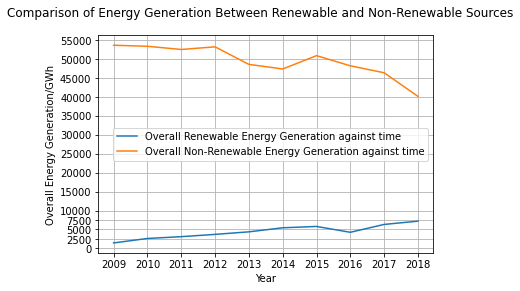

In [331]:
df2=df[df['Category']=='Renewable fuels']
df3=df[df['Category']=='Non-renewable fuels']
Overall_RenewableEnergy=np.array([0 for i in range(10)],dtype='float64')
Overall_NonRenewableEnergy=np.array([0 for i in range(10)],dtype='float64')
STARTING_YEAR=2009
for year in range(2009,2019):
    Overall_RenewableEnergy[year-STARTING_YEAR]=df2[year].sum()
    Overall_NonRenewableEnergy[year-STARTING_YEAR]=df3[year].sum()
#year=np.array([year for year in range(2009,2019)],dtype='int32')
year=np.arange(2009,2019,1)
plt.yticks(np.concatenate((np.arange(0,10000,2500),np.arange(10000,60000,5000))))
plt.xticks(year)
plt.plot(year,Overall_RenewableEnergy,label='Overall Renewable Energy Generation against time')
plt.plot(year,Overall_NonRenewableEnergy,label='Overall Non-Renewable Energy Generation against time')
plt.xlabel('Year')
plt.ylabel('Overall Energy Generation/GWh')
plt.suptitle('Comparison of Energy Generation Between Renewable and Non-Renewable Sources')
plt.legend()
plt.grid()
plt.savefig('A1,task 1b')

### 1.c) Draw a bar chart showing the breakdown of the different fuel types used for energy generation in 2009 vs in 2018? Explain your observation.

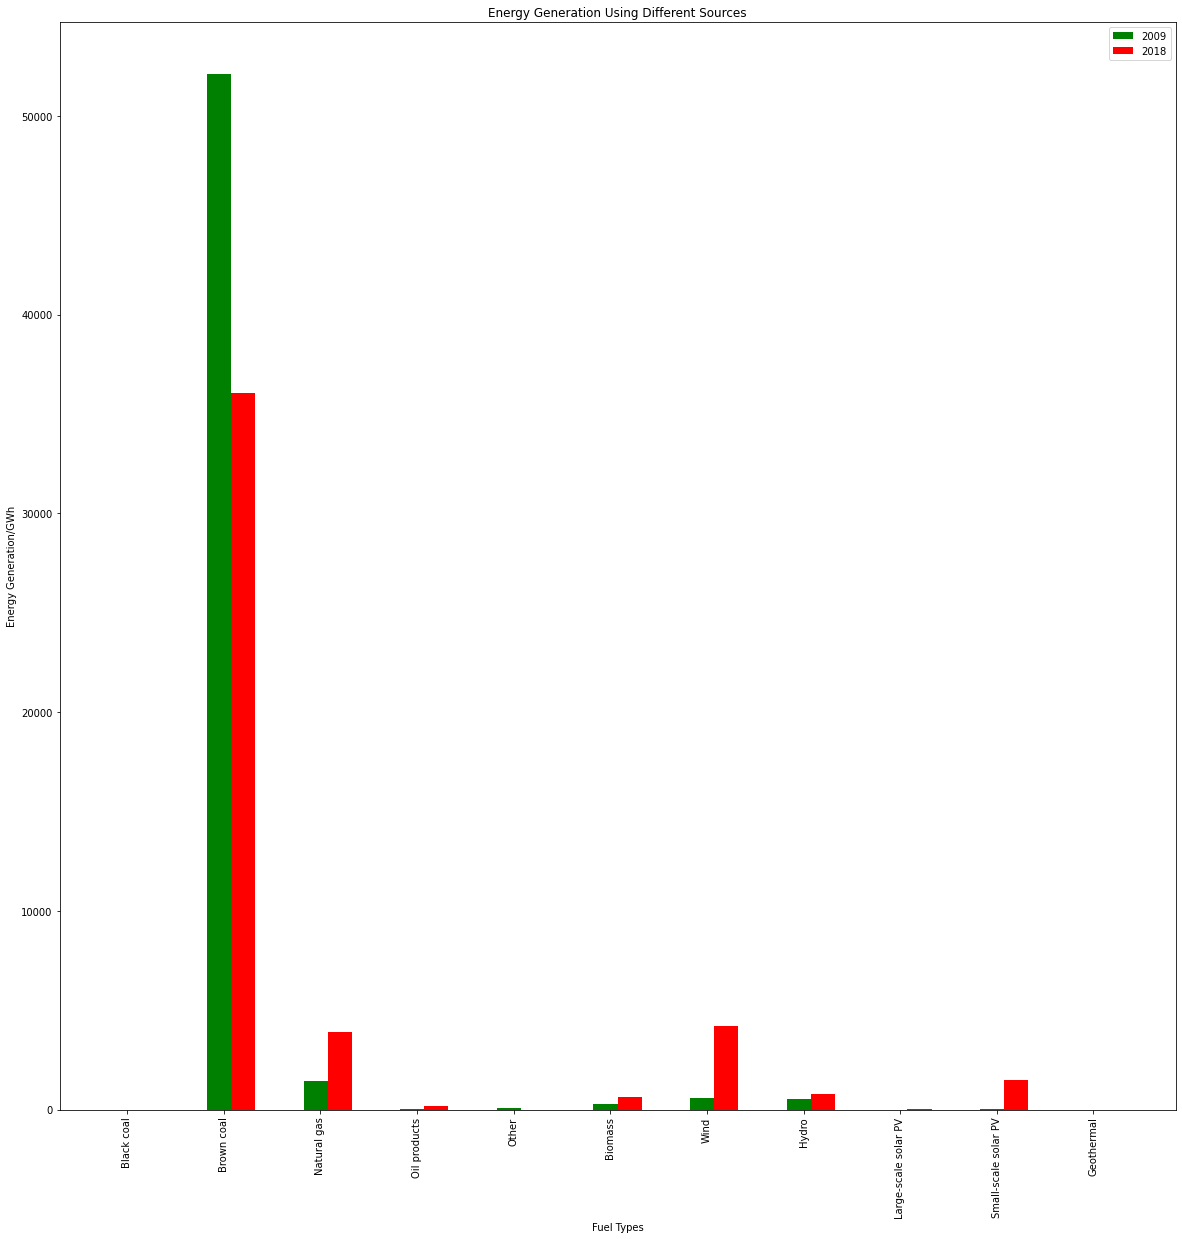

In [346]:
ind = np.arange(0, 11*2, 2)
width = 0.5 # the width of the bars
FuelUse2009=np.array([0 for i in range(11)])
FuelUse2018=np.array([0 for i in range(11)])
for row in range(11):
    FuelUse2009[row]=df.iloc[row,3]
    FuelUse2018[row]=df.iloc[row,12]
FuelType=np.array(df['Fuel_Type'])
fig, ax = plt.subplots(figsize=(20,20))
rects1 = ax.bar(ind, FuelUse2009 , width, color='g',label='2009')
rects2 =ax.bar(ind+width, FuelUse2018 , width, color='r',label='2018')
ax.set_ylabel('Energy Generation/GWh')
ax.set_xlabel('Fuel Types')
ax.set_title('Energy Generation Using Different Sources')
ax.set_xticks(ind+0.1)
ax.set_xticklabels(FuelType,rotation='vertical')
plt.legend()
plt.savefig('A1,task 1c')

### Task 1.d) What was the most used energy resource (fuel-type) in 2015? Which renewable fuel type was the least used in 2015?

In [333]:
df2=df[df['Category']=='Renewable fuels']
highest=0 #Set highest as the lowest possible value
for row in range(11):
    if df.iloc[row,9]>highest: #compare the value in every row
        highest=df.iloc[row,9] #assign new value to highest for the column
        row_highest=row #assign new row_highest when a highest value for a particular column is obtained
print('The most used fuel for 2015 is: ',df.iloc[row_highest,1])
lowest=100000000000000 #Set lowest as the highest possible value
row_lowest=0
for row in range(5): #Taking 5 in order to exclude geothermal in the 5th position of df2, otherwise take 6 if u 
    #wish to include 5th row
    if df2.iloc[row,9]<lowest: #compare the value in every row
        lowest=df2.iloc[row,9] #assign new value to lowest or rest lowest value for the column
        row_lowest=row #assign new row_lowest when a lowest value for a particular column is obtained
print('The least used renewable fuel for 2015 is: ',df2.iloc[row_lowest,1])
#Taking Large-scale solar PV as lowest instead of geothermal as geothermal data is absent
#Although as per the table geothermal is the lowest


The most used fuel for 2015 is:  Brown coal
The least used renewable fuel for 2015 is:  Large-scale solar PV


### 1.e)Draw a plot showing the percentage of Victoria's energy generation coming from Renewable vs Non-Renewable energy sources over the period 2009 to 2018. What can you say about the trend you observe?

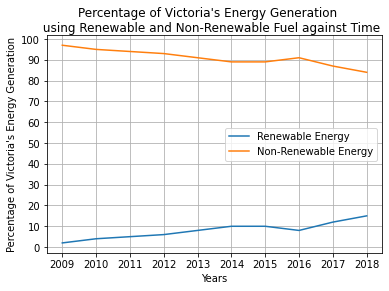

In [334]:
df2=df[df['Category']=='Renewable fuels']
df3=df[df['Category']=='Non-renewable fuels']
Percentage_Renewable=np.arange(0,10,1)
Percentage_NonRenewable=np.arange(0,10,1)
Starting_Year=2009
for column in range(2009,2019):
    Percentage_Renewable[column-Starting_Year]=(df2[column].sum()/df[column].sum())*100
    Percentage_NonRenewable[column-Starting_Year]=(df3[column].sum()/df[column].sum())*100
year=np.arange(2009,2019,1)
plt.plot(year,Percentage_Renewable,label='Renewable Energy')
plt.plot(year,Percentage_NonRenewable,label='Non-Renewable Energy')
plt.xticks(year)
plt.yticks(np.arange(0,110,10))
plt.xlabel('Years')
plt.ylabel('Percentage of Victoria\'s Energy Generation')
plt.grid()
plt.legend()
plt.suptitle('Percentage of Victoria\'s Energy Generation \n using Renewable and Non-Renewable Fuel against Time')
plt.savefig('A1, task 1e')

### 1.f) Using a linear regression model, predict what percentage of Victoria’s energy generation will come from Renewable energy sources in the year 2030, 2100? Do the predictions seem reasonable?

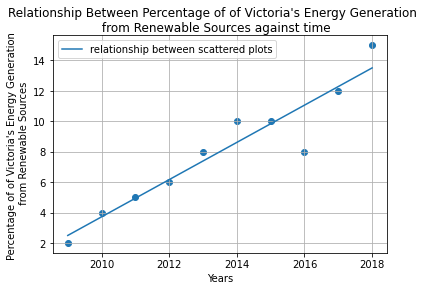

In [335]:
from scipy.stats import linregress
df2=df[df['Category']=='Renewable fuels']
Percentage_Renewable=np.arange(0,10,1)
Starting_Year=2009
for column in range(2009,2019):
    Percentage_Renewable[column-Starting_Year]=(df2[column].sum()/df[column].sum())*100
year=np.arange(2009,2019,1)
plt.scatter(year,Percentage_Renewable)
slope, intercept, r_value, p_value, std_err=linregress(year,Percentage_Renewable)
year_relationship=np.arange(2009,2101,1)
plt.xlabel('Years')
plt.ylabel('Percentage of of Victoria\'s Energy Generation \n from Renewable Sources')
line=[slope*x+intercept for x in year]
plt.plot(year,line,label='relationship between scattered plots')
plt.grid()
plt.legend()
plt.suptitle('Relationship Between Percentage of of Victoria\'s Energy Generation \n from Renewable Sources against time')
plt.savefig('A1, task 1f(1)')


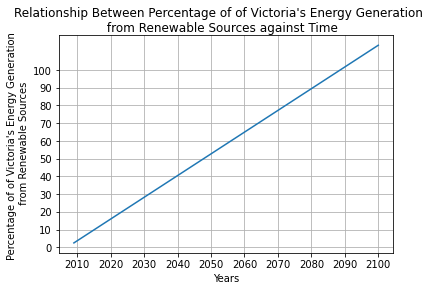

In [347]:
#Using the relationationship obtained by linear regression
from scipy.stats import linregress
df2=df[df['Category']=='Renewable fuels']
Percentage_Renewable=np.arange(0,10,1)
Starting_Year=2009
for column in range(2009,2019):
    Percentage_Renewable[column-Starting_Year]=(df2[column].sum()/df[column].sum())*100
slope, intercept, r_value, p_value, std_err=linregress(year,Percentage_Renewable)
year_relationship=np.arange(2009,2101,1)
plt.xlabel('Years')
plt.ylabel('Percentage of of Victoria\'s Energy Generation \n from Renewable Sources')
line=[slope*x+intercept for x in year_relationship]
plt.plot(year_relationship,line)
plt.yticks(np.arange(0,110,10))
plt.xticks(np.arange(2010,2110,10))
plt.grid()
plt.suptitle('Relationship Between Percentage of of Victoria\'s Energy Generation \n from Renewable Sources against Time')
plt.savefig('A1, task 1f(2)')

In [348]:
pred2030='At year 2030, Percentage of of Victoria\'s Energy Generation from Renewable Sources is: '+str(slope*2030+intercept)
pred2100='At year 2100, Percentage of of Victoria\'s Energy Generation from Renewable Sources is: '+str(slope*2100+intercept)
print(pred2030)
print(pred2100)
print('the correlation coefficient is:',r_value)
print('the p_value is:',p_value)

At year 2030, Percentage of of Victoria's Energy Generation from Renewable Sources is: 28.199999999999818
At year 2100, Percentage of of Victoria's Energy Generation from Renewable Sources is: 113.89696969696934
the correlation coefficient is: 0.9465746211444811
the p_value is: 3.34079478317161e-05
